### What Are Embeddings?
Think of embeddings as a way to translate words into a language that computers understand - numbers!

In [2]:
import numpy as np
import matplotlib.pyplot as plt


In [3]:
# Simplified 2D example (real embeddings have hundreds of dimensions)
word_embeddings = {
    "cat": [0.8, 0.6],
    "kitten": [0.75, 0.65],
    "dog": [0.7, 0.3],
    "puppy": [0.65, 0.35],
    "car": [-0.5, 0.2],
    "truck": [-0.45, 0.15]
}

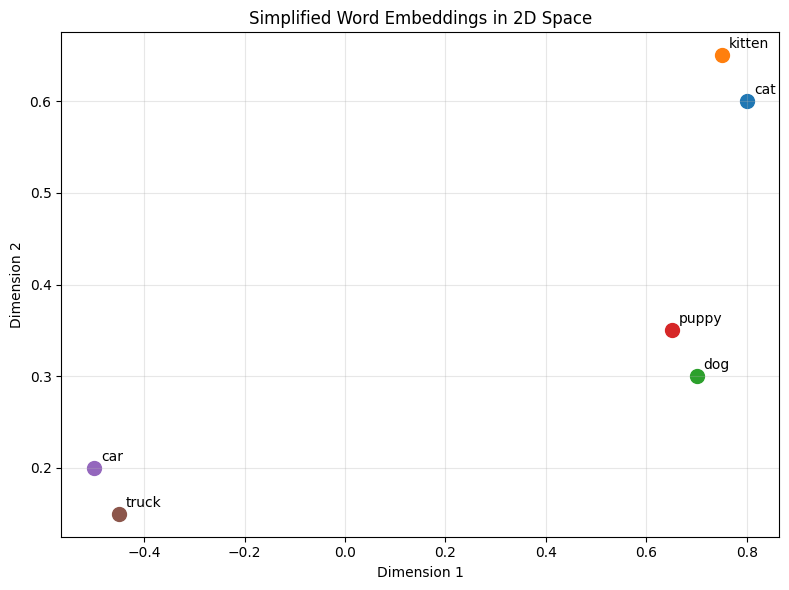

In [4]:
fig, ax = plt.subplots(figsize=(8, 6))

for word, coords in word_embeddings.items():
    ax.scatter(coords[0], coords[1], s=100)
    ax.annotate(word, (coords[0], coords[1]), xytext=(5, 5), 
                textcoords='offset points')

ax.set_xlabel('Dimension 1')
ax.set_ylabel('Dimension 2')
ax.set_title('Simplified Word Embeddings in 2D Space')
ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## Measuring Similarity

In [5]:
def cosine_similarity(vec1, vec2):
    """
    Cosine similarity measures the angle between two vectors.
    - Result close to 1: Very similar
    - Result close to 0: Not related
    - Result close to -1: Opposite meanings
    """

    dot_product=np.dot(vec1,vec2)
    norm_a=np.linalg.norm(vec1)
    norm_b=np.linalg.norm(vec2)
    return dot_product/(norm_a * norm_b)



In [6]:
# Example
cat_vector = [0.8, 0.6, 0.3]
kitten_vector = [0.75, 0.65, 0.35]
car_vector = [-0.5, 0.2, 0.1]

cat_kitten_similarity=cosine_similarity(cat_vector,kitten_vector)
print(cat_kitten_similarity)

0.9966186334192183


In [7]:
cosine_similarity(cat_vector,car_vector)

np.float64(-0.4371858854891681)

### Creating Your First Embeddings

In [8]:
### Huggingface And OpenAI Models

from langchain_huggingface import HuggingFaceEmbeddings

## Initialize a simple Embedding model(no API Key needed!)
embeddings=HuggingFaceEmbeddings(
    model_name="sentence-transformers/all-MiniLM-L6-v2"
)
embeddings




c:\Users\vikas\OneDrive\Desktop\Ultimate-RAG-Bootcamp\RAG\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
'(ReadTimeoutError("HTTPSConnectionPool(host='huggingface.co', port=443): Read timed out. (read timeout=10)"), '(Request ID: 6a9329df-0d31-44ce-920b-443a2fb06302)')' thrown while requesting HEAD https://huggingface.co/sentence-transformers/all-MiniLM-L6-v2/resolve/main/config.json
Retrying in 1s [Retry 1/5].


HuggingFaceEmbeddings(model_name='sentence-transformers/all-MiniLM-L6-v2', cache_folder=None, model_kwargs={}, encode_kwargs={}, query_encode_kwargs={}, multi_process=False, show_progress=False)

In [9]:
## create your first embeddings
text="Hello, I am learning about embeddings!"

embedding=embeddings.embed_query(text)
print(f"Text: {text}")
print(f"Embedding length : {len(embedding)}")
print(embedding)


Text: Hello, I am learning about embeddings!
Embedding length : 384
[-0.018163254484534264, -0.09955170005559921, 0.013816031627357006, -0.008125881664454937, 0.014152240939438343, 0.0640648901462555, -0.006253364961594343, -0.0030178811866790056, 0.02528720535337925, -0.020198654383420944, 0.024329734966158867, 0.07435059547424316, 0.05117719620466232, 0.022038469091057777, -0.058306094259023666, 0.015268317423760891, 0.023584358394145966, 0.09455396234989166, -0.06508845835924149, 0.013296687044203281, -0.020497623831033707, -0.056908540427684784, 0.030303312465548515, -0.08365616202354431, 0.0265963077545166, -0.015231521800160408, -0.0436154305934906, 0.05398393049836159, 0.09025713801383972, -0.08893883228302002, 0.039644572883844376, -0.008835063315927982, -0.03034377656877041, 0.07425563037395477, -0.05409912392497063, 0.11108008772134781, 0.036899834871292114, -0.008959829807281494, -0.06140244007110596, -0.003143396694213152, 0.02195821888744831, 0.0422082394361496, -0.0289379

In [10]:
sentences = [
    "The cat sat on the mat",
    "The cat sat on the mat",
    "The dog played in the yard",
    "I love programming in Python",
    "Python is my favorite programming language"
]

embedding_sentence=embeddings.embed_documents(sentences)

print(embedding_sentence[0])
print(embedding_sentence[1])

[0.1304018497467041, -0.011870135553181171, -0.028117002919316292, 0.05123862996697426, -0.055974457412958145, 0.030191540718078613, 0.030161280184984207, 0.024698389694094658, -0.018370555713772774, 0.05876678600907326, -0.024953218176960945, 0.060154207050800323, 0.0398317314684391, 0.0332304872572422, -0.06131139397621155, -0.04937309771776199, -0.05486347898840904, -0.040076080709695816, 0.05642913654446602, 0.039156559854745865, -0.03473713994026184, -0.013247712515294552, 0.031966179609298706, -0.06349915266036987, -0.060178592801094055, 0.07823445647954941, -0.028303850442171097, -0.04744284972548485, 0.04035928472876549, -0.0066309417597949505, -0.0667409673333168, -0.004191387910395861, -0.025311708450317383, 0.05334170162677765, 0.017428124323487282, -0.09792360663414001, 0.006061271298676729, -0.0652417242527008, 0.04557254537940025, 0.023641740903258324, 0.0765848457813263, -0.010264325886964798, -0.004076776560395956, -0.06232282891869545, 0.03370526805520058, 0.0186611860

In [11]:
from langchain_huggingface import HuggingFaceEmbeddings
import time

# Popular models comparison
models = {
    "all-MiniLM-L6-v2": {
        "size": 384,
        "description": "Fast and efficient, good quality",
        "use_case": "General purpose, real-time applications"
    },
    "all-mpnet-base-v2": {
        "size": 768,
        "description": "Best quality, slower than MiniLM",
        "use_case": "When quality matters more than speed"
    },
    "all-MiniLM-L12-v2": {
        "size": 384,
        "description": "Slightly better than L6, bit slower",
        "use_case": "Good balance of speed and quality"
    },
    "multi-qa-MiniLM-L6-cos-v1": {
        "size": 384,
        "description": "Optimized for question-answering",
        "use_case": "Q&A systems, semantic search"
    },
    "paraphrase-multilingual-MiniLM-L12-v2": {
        "size": 384,
        "description": "Supports 50+ languages",
        "use_case": "Multilingual applications"
    }
}

print("📊 Popular Open Source Embedding Models:\n")
for model_name, info in models.items():
    print(f"Model: sentence-transformers/{model_name}")
    print(f"  📏 Embedding size: {info['size']} dimensions")
    print(f"  📝 Description: {info['description']}")
    print(f"  🎯 Use case: {info['use_case']}\n")


📊 Popular Open Source Embedding Models:

Model: sentence-transformers/all-MiniLM-L6-v2
  📏 Embedding size: 384 dimensions
  📝 Description: Fast and efficient, good quality
  🎯 Use case: General purpose, real-time applications

Model: sentence-transformers/all-mpnet-base-v2
  📏 Embedding size: 768 dimensions
  📝 Description: Best quality, slower than MiniLM
  🎯 Use case: When quality matters more than speed

Model: sentence-transformers/all-MiniLM-L12-v2
  📏 Embedding size: 384 dimensions
  📝 Description: Slightly better than L6, bit slower
  🎯 Use case: Good balance of speed and quality

Model: sentence-transformers/multi-qa-MiniLM-L6-cos-v1
  📏 Embedding size: 384 dimensions
  📝 Description: Optimized for question-answering
  🎯 Use case: Q&A systems, semantic search

Model: sentence-transformers/paraphrase-multilingual-MiniLM-L12-v2
  📏 Embedding size: 384 dimensions
  📝 Description: Supports 50+ languages
  🎯 Use case: Multilingual applications



In [12]:
print("The End")

The End
